Customer Segmentation Using Clustering

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
%pip install kneed

In [9]:
# Step 1: Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [10]:
# Step 2: Explore dataset (EDA)
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [11]:
# Check missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
# Step 3: Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

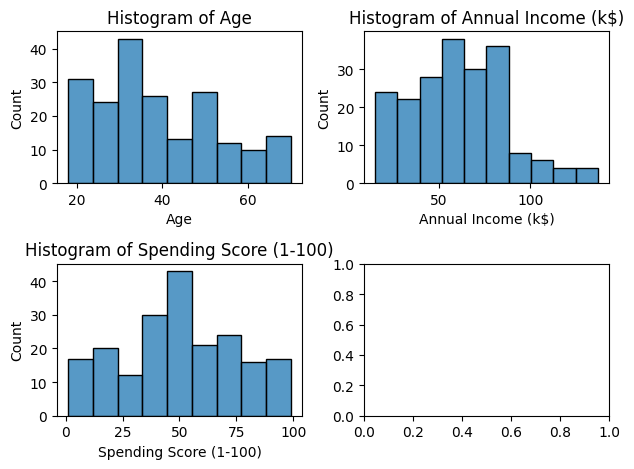

In [7]:
# Visualize the distribution of the features with histograms.
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()

# Iterate over the columns of the X DataFrame and their corresponding subplot axes
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axs[i])

    # The title of the subplot to indicate the column name
    axs[i].set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()


In [16]:
# Step 4: Normalize/scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Optimal number of clusters (Elbow Method): 4


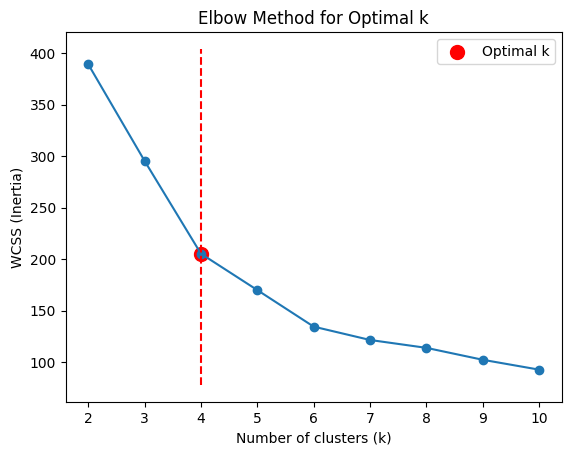

In [24]:
#Step 5: Determine optimal clusters (Elbow Method)
wcss = []
K = range(2, 11)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Find the "elbow" point automatically
kneedle = KneeLocator(K, wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print("Optimal number of clusters (Elbow Method):", optimal_k)

# Plot Elbow curve with optimal point
plt.plot(K, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")

# Highlight the elbow
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles="dashed", colors="red")
plt.scatter(optimal_k, wcss[optimal_k-2], color="red", s=100, label="Optimal k")
plt.legend()
plt.show()

In [55]:
# Step 6: Silhouette Score for better validation
silhouette_scores = []

K = range(2, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

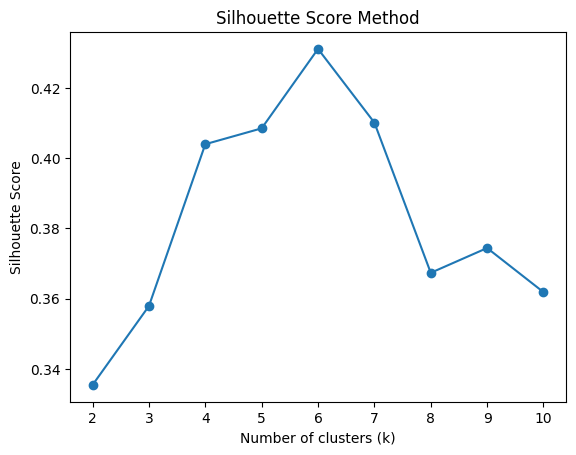

In [58]:
# Plot Silhouette scores
plt.plot(K, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

# Best k based on silhouette
best_k = K[silhouette_scores.index(max(silhouette_scores))]

In [33]:
# Step 7: Apply final KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # choose based on elbow/silhouette
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [43]:
# Step 8: Analyze clusters
cluster_summary = df.groupby("Cluster")[X.columns].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


Visualizing Customer Segments

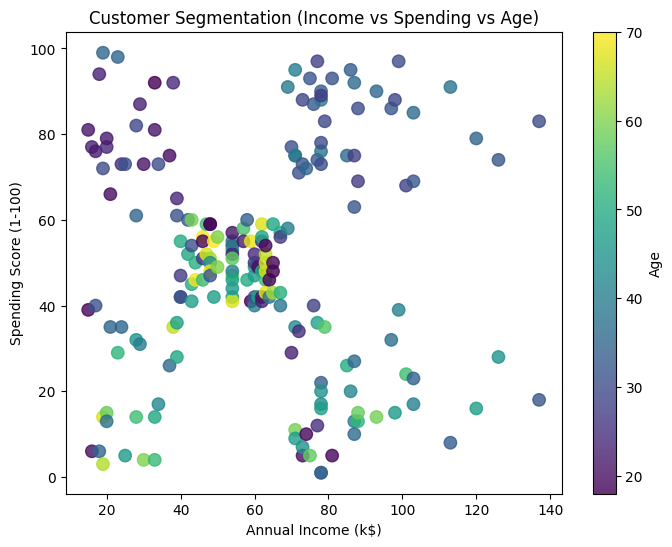

In [67]:
#Step 9: Visualizing Customer Segments
#Method 1: Scatter Plot
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Age'],   # Color represents Age
    cmap='viridis',
    s=80,
    alpha=0.8
)
plt.title("Customer Segmentation (Income vs Spending vs Age)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Add colorbar for Age
cbar = plt.colorbar(scatter)
cbar.set_label("Age")
plt.show()

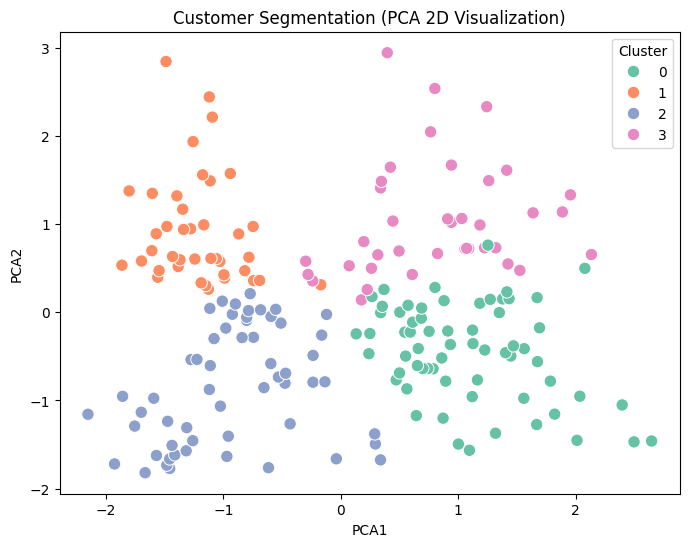

In [66]:
# Method 2 : PCA 2D Visualization
# Reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

# Plot PCA scatter
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=80
)
plt.title("Customer Segmentation (PCA 2D Visualization)")
plt.show()